<a href="https://colab.research.google.com/github/sejaramillotr/Taller1/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1
#2. Concéptos básicos de señales.
1. Evaluar la expresión $$\int^\infty_{-\infty}t^2e^{-sin(t)}cos(2t)\delta(2t-2\pi)dt$$
Nota: Consultar las propiedas de selectividad y escala en el
tiempo de la función impulso unitario. Comprobar el resultado
en simulación con la librería SymPy.

##Solución
Si se reemplaza $$X(t)=t^2e^{-sin(t)}cos(2t)$$ tendríamos que: $$\int^\infty_{-\infty}X(t)\delta(2t-2\pi)dt$$ Y por las propiedades del Delta Dirac: $$\delta(2t-2\pi)=\delta(2(t-\pi))=\frac{\delta(t-\pi)}{2}$$ por lo tanto:
$$\int^\infty_{-\infty}X(t)\frac{\delta(t-\pi)}{2}dt=\frac{1}{2}\int^\infty_{-\infty}X(t)\delta(t-\pi)dt=\frac{1}{2}X(\pi)$$
$$\frac{1}{2}X(\pi)=\frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi)=\frac{1}{2}*\pi^2*e^{0}*1$$
$$X(\pi)=\frac{\pi^2}{2}$$





In [0]:
# Solución 1. 
import sympy as sym
from sympy import DiracDelta
from sympy import integrate
from sympy import oo


t= sym.symbols('t', real=True)
T=(t**2)*sym.exp(-sym.sin(t))*sym.cos(2*t)
sym.integrate(T*sym.DiracDelta(2*t-2*sym.pi), (t,-oo,oo))


pi**2/2

2.   Sea $$x(t)=u(t-t_0)-u(t-nt_0)-k\delta(t-mt_0)$$ Determine
el valor de k para el cual $$\int^\infty_{-\infty}x(t)dt=0$$ Comprobar el resultado en simulación con la librería SymPy.

##Solución
Por sus propiedades podemos separar la integral de la siguiente forma
$$\int^\infty_{-\infty}u(t-t_0)-u(t-nt_0)-k\delta(t-mt_0)dt=0$$
$$\int^\infty_{-\infty}u(t-t_0)-u(t-nt_0)dt-k\int^\infty_{-\infty}\delta(t-mt_0)dt=0$$
$$\int^{nt_0}_{t_0}1dt-k=0$$
$$nt_0-t_0=k$$
$$t_0(n-1)=k$$

Como lo demuestra la simulación con $t_0=3$,$n=2$ y $k=3(2-1)=3$. Debido a la funcionalidad de $\delta$ el valor de m no tiene repercusiones en el resultado.
El rectángulo de la gráfica muestra un área de $A_u=b*h=3*1=3$ y el área calculada del $\delta$ es $A_\delta=-3$ por lo que en total nos da un area (integral) de 0.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


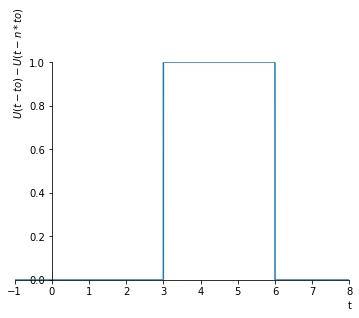

-3

In [0]:
# Solución 1. 
import sympy as sym
from sympy import DiracDelta
from sympy import integrate
from sympy import oo

t, m= sym.symbols('t, m', real=True)



uto = sym.Heaviside(t-to)
unto = sym.Heaviside(t-2*to) #n=2
xt = uto-unto
dd = sym.DiracDelta(t-m*to)

sym.plot(xt.subs({to : 3}), (t, -1, 8), ylabel=r'$U(t-to)-U(t-n*to)$')

#sym.integrate(xt, (t,to,n*to))
sym.integrate(-3*dd, (t,-oo,oo)) #k=3

3.   Consulte en qué consisten las señales cuasiperiódicas. Luego,
demuestre la periodicidad o no de las siguientes señales:

$$x(t) = 3 cos(\omega t)$$
$$x(t) = 2 sin(\omega t +\pi)$$
$$x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) - 2 cos(t/\sqrt{3})$$
$$x(t) = 3 sin(4t) - 2 cos(50t) + 2 cos(10t)$$
$$x(t) = e^{j\omega t}$$

Graﬁque cada una de las señales anteriores en Python utilizando
arreglos de numpy (dibuje tres periodos si es el caso).


##Solución

1. $x(t) = 3 cos(\omega t)$

Excluimos el 3 al inicio ya que no afecta internamente al coseno.
$$ cos(\omega t)= cos(\omega (t+T))$$
$$cos(\omega (t+T))=cos(\omega t)cos(\omega T)-sin(\omega t)sin(\omega T)$$
Para que la igualdad se cumpla $cos(\omega T)=1$ y $sin(\omega T)=0$ por lo tanto $\omega T=2\pi$ pero si recordamos la definición $\omega =\frac{2\pi}{T}$. Entonces $\frac{2\pi}{T}T=2\pi$. Son iguales, $x(t)$ es periódic.

2. $x(t) = 2 sin(\omega t +\pi)$

Por propiedades trigonométricas tenemos que $2 sin(\omega t + \pi)=2 cos(\omega t)$. Siguiendo la lógica anterior, $x(t)$ es periódica.

3. $x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) - 2 cos(t/\sqrt{3})$

Para que sea periódica, debe cumplir que $\frac{\omega_1}{\omega_2} ; \frac{\omega_2}{\omega_3} ; \frac{\omega_3}{\omega_1}\in \mathbb{Q}$ y ya que $w_1=\sqrt{3}$ y $w_3=\frac{1}{\sqrt{3}}$, $x(t)$ es aperiódica.

4. $x(t) = 3 sin(4t) - 2 cos(50t) + 2 cos(10t)$

Siendo $\omega_1=4 ; \omega_2=50 ; \omega_3=10$ vemos que:
$$\frac{\omega_1}{\omega_2} ; \frac{\omega_2}{\omega_3} ; \frac{\omega_3}{\omega_1}\in \mathbb{Q}$$ Entonces, $x(t)$ es cuasiperiódica.

5. $x(t) = e^{j\omega t}$

Escrito de otra forma $x(t) = e^{j\omega t} = cos(\omega t)+jsin(\omega t)$

Como se aprecia, son dos funciones periódicas aunque en diferentes ejes, por lo que $x(t)$ es periódica.

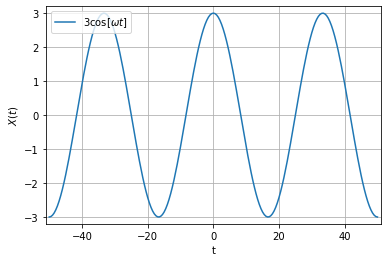

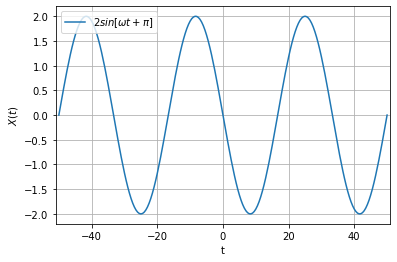

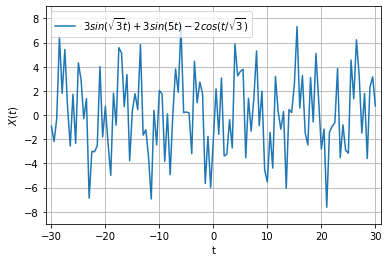

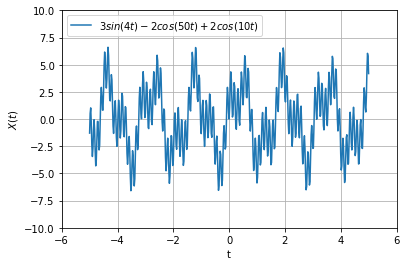

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in sqrt


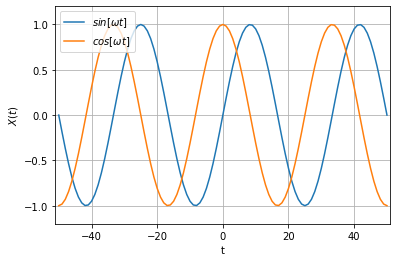

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Gráfica señal 1
N=50
w=3*np.pi/50
A=3

x1=np.linspace(-N,N,4*N+1)
y1 = A*np.cos(w*x1)

plt.plot(x1,y1,label="$3\cos[\omega t]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-3.2,3.2)
plt.show()


#Gráfica señal 2
N=50
w=3*np.pi/50
A=2

x1=np.linspace(-N,N,4*N+1)
y1 = A*np.sin(w*x1+np.pi)


plt.plot(x1,y1,label="$2sin[\omega t+\pi]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-2.2,2.2)
plt.show()

#Gráfica señal 3
N=30
A=3
B=3
C=-2
D=np.sqrt(3)
E=5
F=1/D
x1=np.linspace(-N,N,4*N+1)
y1 = A*np.sin(D*x1)+B*np.sin(E*x1)+C*np.cos(F*x1)


plt.plot(x1,y1,label="$3 sin(\sqrt{3}t) + 3 sin(5t) - 2 cos(t/\sqrt{3})$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-9,9)
plt.show()

#Gráfica señal 4
N=5
A=3
B=-2
C=2
D=4
E=50
F=10
x1=np.linspace(-N,N,100*N+1)
y = A*np.sin(D*x1)+B*np.cos(E*x1)+C*np.cos(F*x1)
plt.plot(x1,y,label="$3 sin(4t) - 2 cos(50t) + 2 cos(10t)$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-10,10)
plt.show()


#Gráfica señal 5
N=50
w=3*np.pi/50
A=3
x1=np.linspace(-N,N,2*N+1)
y1 = np.sin(w*x1)
y2 = np.cos(w*x1)


plt.plot(x1,y1,label="$sin[\omega t]$")
plt.plot(x1,y2,label="$cos[\omega t]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(-1.2,1.2)
plt.show()


#3. Señales de Energía y Potencia
Clasiﬁque según su tipo (energía o potencia):

A. $x(t) = 3t + 1; \forall t \in[0; 5]$

B. $x(t) = A\cos(\omega t) + B \sin(\omega t) ; A, B, \omega \in\mathbb{R^+}$

C. $x(t) = ate^{tk}(u(t)-u(t-to)) ; a, k \in {R}; t_0> 0$

D. $x[n] = nu[n] ; n\in[{0,\pm1,\pm2,\dots,\pm N}]$

E. $x[n] = \cos[n\pi] + \sin[2n\pi/3]; n\in[0, 1,\dots, N]; N \in \mathbb{N}$

F. $x[n] = Acos[n\pi]u[n-n_o]; A\in \mathbb{R^+} ; n\it [0,\pm1, \pm2, \dots, \pmN]; 0 < n< N$

Graﬁque cada una de las señales anteriores en Python (considere
simulaciones tipo plot para tiempo continuo y stem para tiempo
discreto).


##Solución
##A. $x(t) = 3t + 1; \forall t \in[0, 5]$

$$Muestras=[0,1,2,3,4,5] => 6$$
$$E_x=\sum^T_{t=0}|-3t+1|^2dt=\sum^T_{t=0}(9t^2-6t+1)$$
$$E_x=1+4+64+121+196=386\geq0$$
$$P_x=\frac{E_x}{Muestras}=\frac{386}{6}=\frac{193}{3}\geq 0$$
Estos son los valores para determinado intervalo. Sin embargo, cuando $T\rightarrow \infty$
$$E_x=\lim_{T\rightarrow \infty}\int^{T/2}_{-T/2}|-3t+1|^2dt=\lim_{T\rightarrow \infty}\int^{T/2}_{-T/2}9t^2-6t+1dt$$
$$$$
$$\lim_{T\rightarrow \infty} 3t^3-3t^3+t \biggr|^{T/2}_{-T/2}=\lim_{T\rightarrow \infty}\frac{3T^3}{8}-\frac{3T^2}{4}+\frac{T}{2}-[\frac{-3T^3}{8}-\frac{3T^2}{4}+\frac{-T}{2}]$$
$$\lim_{T\rightarrow \infty}\frac{3T^3}{4}+T=\infty$$
Por lo tanto, $x(t)$ no es señal de energía.

$$P_x=\lim_{T\rightarrow \infty}\frac{E_x}{T}=\lim_{T\rightarrow \infty}\frac{3T^2}{4}+1=\infty$$
Por lo que $x(t)$ tampoco es señal de potencia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


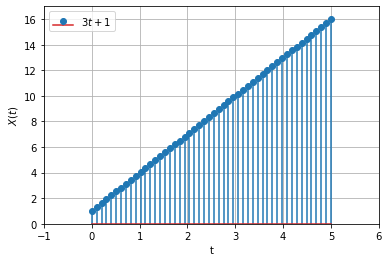

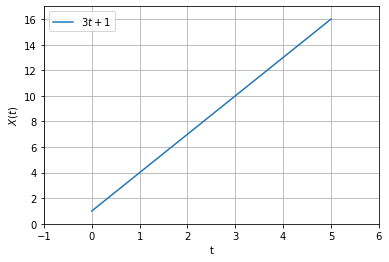

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Gráfica señal 1.1
a=0
b=5
N=50
x=np.linspace(a,b,N)
y= 3*x+1



plt.stem(x,y,label="$3t + 1$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(a-1,b+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(min(y)-1,max(y)+1)
plt.show()

#Gráfica señal 1.2
a=0
b=5
N=50
x=np.linspace(a,b,N)
y= 3*x+1



plt.plot(x,y,label="$3t + 1$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(a-1,b+1)
plt.xlabel("t")
plt.ylabel("$X(t)$")
plt.ylim(min(y)-1,max(y)+1)
plt.show()


##B. $x(t) = A\cos(\omega t) + B \sin(\omega t) ; A, B, \omega \in\mathbb{R^+}$
$$E(T)=\int^{T/2}_{-T/2}|A\cos(\omega t) + B \sin(\omega t)|^2dt=$$
$$\int^{T/2}_{-T/2}A^2\cos^2(\omega t)+AB\cos(\omega t)\sin(\omega t) + B^2 \sin^2(\omega t)dt=$$
$$E(T)=\frac{(A^2 + B^2)Tw + (A^2 - B^2) sin(T w)}{2w}<=>\omega =\frac{2\pi}{T}$$
$$E(T)=\frac{[(A^2 + B^2)2\pi + (A^2 - B^2) sin(2\pi)]*T}{4\pi}<=>sin(2\pi)=0$$
$$E(T)=\frac{(A^2 + B^2)*T}{2}$$
$$\lim_{N\rightarrow \infty}E(T)=\lim_{N\rightarrow \infty}\frac{(A^2 + B^2)*T}{2}=\infty$$
No es una señal de energía.
$$P(T)=\frac{E(T)}{T}=\frac{(A^2 + B^2)}{2}$$
$$\lim_{N\rightarrow \infty}P(T)=\lim_{N\rightarrow \infty}\frac{(A^2 + B^2)}{2}=\frac{(A^2 + B^2)}{2}$$
Por lo tanto $x(t)$ es una señal de potencia mientras $A,B<\infty$ ya que por definición, no pueden ser negativos ni imaginarios.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


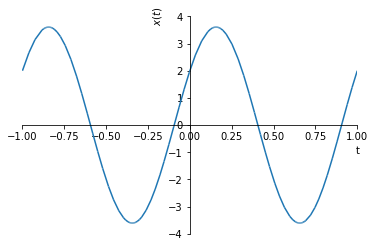

⎧                                                              2              
⎪                                                             A ⋅t            
⎪                                                                             
⎨ 2      2         2      2         2                            2         2  
⎪A ⋅t⋅sin (t⋅w)   A ⋅t⋅cos (t⋅w)   A ⋅sin(t⋅w)⋅cos(t⋅w)   A⋅B⋅cos (t⋅w)   B ⋅t
⎪────────────── + ────────────── + ──────────────────── - ───────────── + ────
⎩      2                2                  2⋅w                  w             

                                                             
                                                    for w = 0
                                                             
    2         2      2         2                             
⋅sin (t⋅w)   B ⋅t⋅cos (t⋅w)   B ⋅sin(t⋅w)⋅cos(t⋅w)           
────────── + ────────────── - ────────────────────  otherwise
  2                2                  2⋅w                    

In [0]:
#Gráfica señal 3
import sympy as sym
from sympy import init_printing
init_printing()

t, A, B, w = sym.symbols('t A B w', real=True)

x = A*sym.cos(w*t)+B*sym.sin(w*t)
sym.plot(x.subs({A: 2, B : 3, w : 2*sym.pi}), (t,-1, 1),ylim=[-4,4], ylabel=r'$x(t)$')


$$\begin{cases} A^{2} t & \text{for}\: w = 0 \\\frac{A^{2} t}{2} \sin^{2}{\left (t w \right )} + \frac{A^{2} t}{2} \cos^{2}{\left (t w \right )} + \frac{A^{2}}{2 w} \sin{\left (t w \right )} \cos{\left (t w \right )} - \frac{A B}{w} \cos^{2}{\left (t w \right )} + \frac{B^{2} t}{2} \sin^{2}{\left (t w \right )} + \frac{B^{2} t}{2} \cos^{2}{\left (t w \right )} - \frac{B^{2}}{2 w} \sin{\left (t w \right )} \cos{\left (t w \right )} & \text{otherwise} \end{cases}$$

##C. $x(t) = ate^{tk}(u(t)-u(t-to)) ; a, k \in {R}; t_0> 0$

Calculando la energía en función de $t_o$ (variable que controla el trozo de señal a considerar distanta de cero), se tiene que:

$$E(t_o)= \int^{T/2}_{-T/2}|ate^{tk}(u(t)-u(t-t_o))|^2dt = \int^{t_o}_{0}|ate^{tk}|^2dt $$
$$E(t_o)= \int^{t_o}_{0}{a^2 t^2 e^{2tk}} dt = \frac{(2a^2k^2t^2-2a^2kt+a^2)e^{2kt}}{4 k^3}\Biggr|_{0}^{t_o}$$
$$E(t_o)=\frac{(2a^2k^2t_o^2+2a^2kt_o+a^2)e^{2t_ok}}{4k^3}-\frac{a^2}{4k^3}$$
Si evaluamos el límite para $t_o\rightarrow \infty$ tendríamos que:

$$\lim_{t_o\rightarrow \infty}E(t_o)=\lim_{t_o\rightarrow \infty} \frac{(2a^2k^2t_o^2+2a^2kt_o+a^2)e^{2t_ok}}{4k^3}-\frac{a^2}{4k^3}= \infty$$

Por lo tanto no es una señal de energía. Ahora, si aplicamos $P_x=\frac{E_x}{t_0}$ nos da que:
$$P_x=\frac{\frac{(2a^2k^2t_o^2+2a^2kt_o+a^2)e^{2t_ok}}{4k^3}-\frac{a^2}{4k^3}}{t_0}=\frac{(2a^2k^2t_o^2+2a^2kt_o+a^2)e^{2t_ok}}{4k^3t_0}-\frac{a^2}{4k^3t_0}$$
Cuando $t_o\rightarrow \infty$, 
$$\lim_{t_o\rightarrow \infty}\frac{a^2}{4k^3t_0}=0$$ $$\lim_{t_o\rightarrow \infty}\frac{(2a^2k^2t_o^2+2a^2kt_o+a^2)e^{2t_ok}}{4k^3t_0}=\infty$$ 
Aplicamos L'Hopital
$$\lim_{t_o\rightarrow \infty}\frac{4ke^{2kt_o}(akt+a)^2}{4k^3}=\infty$$
Por lo tanto comprobamos que $x(t)$ no es señal de potencia tampoco.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


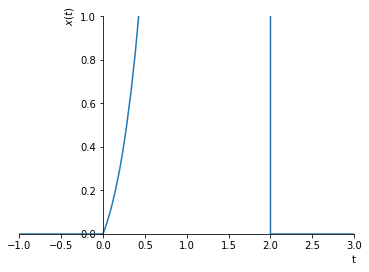

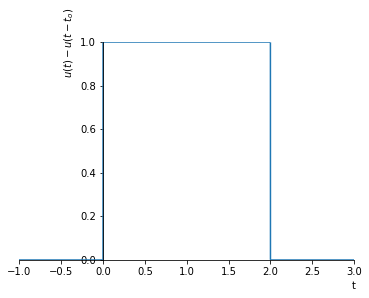

In [0]:
#Gráfica señal 3
import sympy as sym
from sympy import init_printing
init_printing()

t, a, k, to = sym.symbols('t a k to', real=True)

u = sym.Heaviside(t)
uto = sym.Heaviside(t-to)
ch = u -uto

x = a*t*sym.exp(k*t)*ch
sym.plot(x.subs({a: 1, k : 2, to : 2}), (t, -1, 3), ylabel=r'$x(t)$')
sym.plot(ch.subs({to : 2}), (t, -1, 3), ylabel=r'$u(t)-u(t-t_o)$')

##D. $x[n] = nu[n] ; n\in[0,\pm1,\pm2,\dots,\pm N]$

$$Muestras=[0,\pm1,\pm2,\dots,\pm N] => T=2N+1$$
$$E_x=\sum^N_{n=-N}|nu(n)|^2dn=\sum^N_{n=0}n^2$$
$$E_x=\frac{N(N+1)(2N+1)}{6}$$
$$E_x=\lim_{N\rightarrow \infty}\frac{N(N+1)(2N+1)}{6}=\infty$$
Por lo tanto, $x(n)$ no es una señal de energía.
$$P_x=\lim_{N\rightarrow \infty}\frac{E_x}{T}=\lim_{N\rightarrow \infty}\frac{N(N+1)(2N+1)}{6(2N+1)}=\lim_{N\rightarrow \infty}\frac{N(N+1)}{6}=\infty$$
Por lo que $x(n)$ tampoco es señal de potencia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


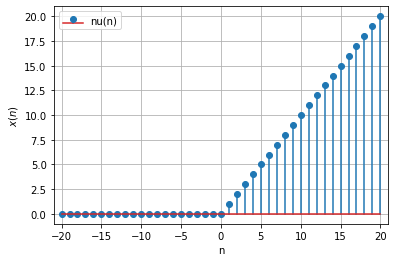

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Gráfica señal 4
N=20

x=np.linspace(-N,N,2*N+1)
u=np.heaviside(x,1)
y= x*u

plt.stem(x,y,label="nu(n)")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("n")
plt.ylabel("$x(n)$")
plt.ylim(min(y)-1,max(y)+1)


##E. $x[n] = \cos[n\pi] + \sin[2n\pi/3]; n\in[0, 1,\dots, N]; N \in \mathbb{N}$
$$E_x=\sum^N_{n=0}|\cos[n\pi] + \sin[2n\pi/3]|^2$$
$$\sum^N_{n=0}\cos^2[n\pi]+2\cos[n\pi]\sin[2n\pi/3]+\sin^2[2n\pi/3]$$
Como $cos(n\pi)=\pm1=(-1)^n=>cos^2(n\pi)=(-1)^{2n}=1$
$$\sum^N_{n=0}1+2(-1)^n\sin[2n\pi/3]+\sin^2[2n\pi/3]=N+1+\sum^N_{n=0}2(-1)^n\sin[2n\pi/3]+\sin^2[2n\pi/3]$$
Entonces $\lim_{N\rightarrow\infty}E_x=\infty$ ya que $\lim_{N\rightarrow\infty}N+1=\infty$.Para ver si es una señal de potencia tenemos que $\sin^2[2n\pi/3]=\frac{3}{4}$ dos números de 3 y $0$ el tercero. Por lo que $N\rightarrow\infty$, $\sum^N_{n=0}\sin^2[2n\pi/3]=\frac{3}{4}(N+1)*\frac{2}{3}$. Además $\sin[2n\pi/3]$ siempre toma 3 valores: $\frac{\sqrt{3}}{3};\frac{-\sqrt{3}}{3};0$. Por lo que se puede representar como $(-1)^{n+1}\frac{\sqrt{3}}{2}$. Siguiendo la misma analogía:
$$\sum^N_{n=0}2(-1)^n\sin[2n\pi/3]=2(-1)^{2n+1}\frac{\sqrt{3}}{2}*\frac{2}{3}(N+1)=\frac{-2\sqrt{3}}{2}(N+1)$$

$$E_x=N+1+\frac{N+1}{2}+\frac{-2\sqrt{3}}{3}(N+1)$$ 

Ahora, para potencia vemos que si $n\in[0, 1,\dots, N]; N \in \mathbb{N}=>T=N+1$ 
$$P_x=\frac{E_x}{T}=\frac{E_x}{N+1}=1+\frac{1}{2}+\frac{-2\sqrt{3}}{3}=0.345\geq0$$
Por lo que $E_x$ es una señal de potencia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


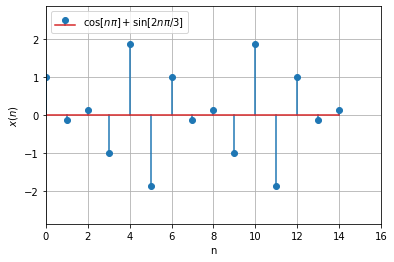

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Gráfica señal 5
N=15
n=np.arange(0,N,1)
y= np.cos(n*np.pi)+np.sin(2*n*np.pi/3)

plt.stem(n,y,label="$\cos[n\pi] + \sin[2n\pi/3]$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(0,N+1)
plt.xlabel("n")
plt.ylabel("$x(n)$")
plt.ylim(min(y)-1,max(y)+1)

##F. $x[n] = Acos[n\pi]u[n-n_o];A\in\mathbb{R^+};n\it [0,\pm1,\pm2, \dots, \pmN]; 0 < n< N$

$$E(N)=\sum^N_{n=-N}{|A\cos[n\pi]u[n-n_o]|^2}=\sum^N_{n=n_o}{|A \cos[n\pi]|^2}$$
$$\sum^N_{n=n_o}{\frac{A^2}{2} +\frac{A^2}{2}\cos[2n\pi]}; \cos[2n\pi]=1;1$$
$$\sum^N_{n=n_o}A^2 = A^2(N-n_o+1)$$

Evaluando el límite 
$$\lim_{N\rightarrow \infty}E(N)=\infty$$
notamos que $x[n]$ no es señal de energía. Ahora, calculando la potenca y aplicando el mismo límite vemos que
$$P(N)=\frac{1}{2N+1}E(N) = \frac{A^2}{2N+1}(N-n_o+1)$$
$$\lim_{N\rightarrow \infty}P(N)=\lim_{N\rightarrow \infty} \frac{A^2}{2}= \frac{A^2}{2}$$


Por lo tanto, $x[n]$ es una señal de potencia mientras $0<A<\infty.$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


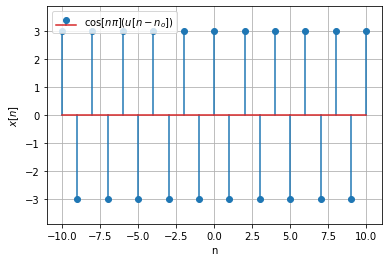

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Grafica señal 6
N = 10
n0 = 2
A  = 3
n = np.linspace(-N,N,2*N+1)
u = np.heaviside(n0,1) 
x = A*np.cos(n*np.pi)*u

plt.stem(n,x,label="$\cos[n\pi](u[n-n_o])$")
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-N-1,N+1)
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.ylim(min(y)-2,max(y)+2)



#4. Discretización de Señales Cosenoidales

A) Se pretende muestrear la señal $x(t)= cos(t)$ ; $ t\in[0, T]$ ; $\Omega  = 2\pi F$ ; $F=\frac{1}{T}$ y $F=60Hz.$ Se emplea un sistema
de discretización con frecuencia de muestreo $F=90Hz$. Demuestre si el sistema utilizado es apropiado para la señal $x(t)$ y estime la señal capturada. Realice una simulación en Python del proceso de discretización.

B) Se tiene un microprocesador de 3 bits con entrada análoga
entre 0 y 10 [V]. Describa las condiciones necesarias para
que el microprocesador pueda digitalizar la señal $x(t)=9cos(200t)$.Presente una simulación en Python de dicho proceso para un ciclo de la señal $x(t)$.

C) Se tiene un sistema de discretización con frecuencia de muestreo $F_s=40Hz$, aplicado a las señales $x(t)=cos(20\pi t)$ y $x(t) = cos(100\pi t)$: Las versiones discretizadas de las señales son distinguibles entre si?. Implemente simulación en Python del proceso de discretización.

D) ¿Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal $x(t)=3cos(2000\pi t)+5sin(6000\pi t)+10 cos(12000\pi t)$? Si se utiliza una frecuencia de muestreo de 5kHz, ¿cuál es la señal discreta obtenida?

E) Demuestre que funciones cosenoidales con frecuencia de oscilación $F_k=F_o+ kF_s$; con $k\in \mathbb{Z}$, no son distinguibles de la función $\cos(2\pi F_0t)$ al utilizar un sistema de discretización con frecuencia de muestreo $F_s$. Realice simulaciones para $k \in (0; \pm1; \pm2; \pm3)$.


##Solución

A) Se pretende muestrear la señal $x(t)= cos(\Omega t)$ ; $ t\in[0, T]$ ; $\Omega  = 2\pi F$ ; $F=\frac{1}{T}$ y $F=60Hz.$ Se emplea un sistema
de discretización con frecuencia de muestreo $F_s=90Hz$. Demuestre si el sistema utilizado es apropiado para la señal $x(t)$ y estime la señal capturada. Realice una simulación en Python del proceso de discretización.

Para que el proceso de discretización se dé correctamente se tiene que $F_{sideal}=2F$.
$$F_{sideal}=2*(60Hz)=120Hz$$
Como se aprecia, la frecuencia utilizada no es lo suficientemente grande para realizar un buen proceso de discretización.
Con esta frecuencia usada tendríamos:
$$x(t)= \cos(2\pi Ft)=>t=nT_s=>x(nT_s)=\cos(2\pi FnT_s)=\cos(\frac{2\pi*F*n}{F_s})=\cos(2\pi n\frac{60}{90})=\cos(\frac{4\pi n}{3})$$

No handles with labels found to put in legend.


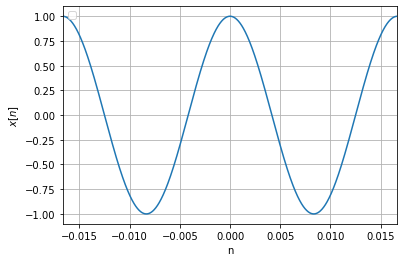

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
No handles with labels found to put in legend.


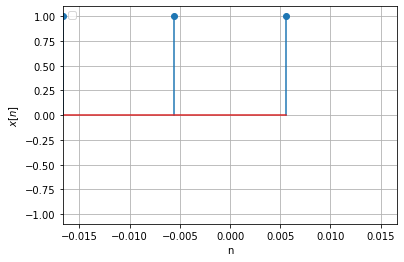

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Discretización 1

F = 60
w = 2*np.pi*F
Fs  = 90
N = 1000
T = 1/F
Ts = 1/Fs
x = np.linspace(-T,T,N)
n = np.arange(-T,T,Ts) 
y = np.cos(w*x)
y1 = np.cos(4*np.pi*n/3)
plt.plot(x,y)
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-T,T)
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.ylim(min(y)*1.1,max(y)*1.1)
plt.show()
plt.stem(n,y1)
plt.grid()
plt.legend(loc='upper left')
plt.xlim(-T,T)
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.ylim(min(y1)*-1.1,max(y1)*1.1)
plt.show()

B) Se tiene un microprocesador de 3 bits con entrada análoga
entre 0 y 10 [V]. Describa las condiciones necesarias para
que el microprocesador pueda digitalizar la señal $x(t)=9cos(200\pi t)$.Presente una simulación en Python de dicho proceso para un ciclo de la señal $x(t)$.

Para hacer una correcta discretización, tenemos que $\omega =200\pi$ por lo tanto $F_0=100Hz$ y por NyQuist sabemos que $F_s\geq2F_0=> F_s\geq200Hz$

Ya que la onda va de $-9\leq V_o\leq 9$, debe ajustarse al voltaje del microprocesador $0\leq V_m\leq 10$ por medio de una función $y(t)=mx(t)+b$.
Vamos a usar los "puntos": $V_o=>V_s ; -9=>0 ; 9=>10$.
$$m=\frac{10-0}{9-(-9)}=\frac{5}{9}$$
$$y(t)-mx(t)=b=> 10-\frac{5}{9}*9=5$$
$$m=\frac{5}{9} ; b=5$$
Ya que el sistema maneja 8 bits, el intervalo $[0,10]$ debe dividirse en $8$ partes así:

\begin{array}{c|c} \hline
x[t] & x_d[n] & Binario\\ \hline
[0.00,1.25) & 0.00 & 000\\ \hline
[1.25,2.50) & 1.25 & 001\\ \hline
[2.50,3.75) & 2.50 & 010\\ \hline
[3.75,5.00) & 3.75 & 011\\ \hline
[5.00,6.25) & 5.00 & 100\\ \hline
[6.25,7.50) & 6.25 & 101\\ \hline
[7.50,8.75) & 7.50 & 110\\ \hline
[8.75,10.00] & 8.75 & 111\\ \hline
\end{array}




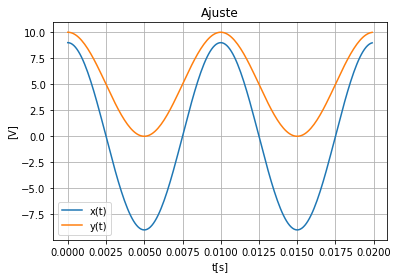

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


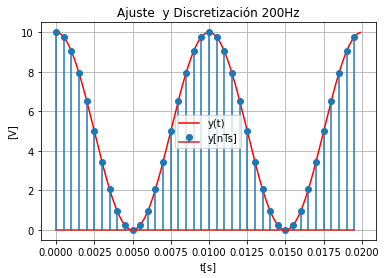

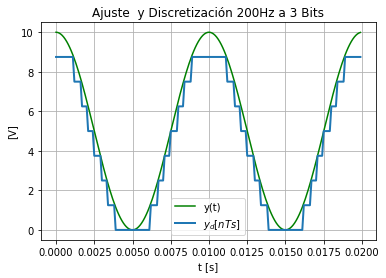

In [0]:
#Discretización 2
import numpy as np
import matplotlib.pyplot as plt


F = 100
Fc = 100*F 
Fs = 20*F 
Tp = 1/F 
t = np.arange(0,2*Tp,1/Fc)

x = 9*np.cos(2*np.pi*F*t)

m = 5/9
b = 5
y = m*x+b

plt.plot(t,x,label="x(t)")
plt.plot(t,y,label="y(t)")
plt.legend()
plt.xlabel('t[s]')
plt.ylabel('[V]')
plt.grid()
plt.title("Ajuste")
plt.show()

Tm = np.arange(0,2*Tp,1/Fs)
xm = 9*np.cos(2*np.pi*F*Tm)
ym = m*xm+b

plt.plot(t,y,color='r',label="y(t)")
plt.stem(Tm,ym,label="y[nTs]")
plt.legend()
plt.xlabel('t[s]')
plt.ylabel('[V]')
plt.grid()
plt.title("Ajuste  y Discretización 200Hz")
plt.show()


yd = np.zeros(len(y))

for g in range(len(y)):
    if y[g] < 1.25:
       yd[g] = 0
    elif (y[g] >= 1.25) and (y[g] <= 2.5):
        yd[g] = 1.25
    elif (y[g] >= 2.5) and (y[g] <= 3.75):
        yd[g] = 2.5
    elif(y[g] >= 3.75) and (y[g] <= 5):
        yd[g] = 3.75
    elif (y[g] >= 5) and (y[g] <= 6.25):
        yd[g] = 5
    elif (y[g] >= 6.25) and (y[g] <= 7.5):
        yd[g] = 6.25
    elif(y[g] >= 7.5) and (y[g] <= 8.75):
        yd[g] = 7.5
    else:
        yd[g] = 8.75
    
plt.plot(t,y,color='g',label="y(t)")
plt.plot(t,yd,label="$y_d[nTs]$",linewidth = 2)
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('[V]')
plt.grid()
plt.title("Ajuste  y Discretización 200Hz a 3 Bits")
plt.show()




C) Se tiene un sistema de discretización con frecuencia de muestreo $F_s=40Hz$, aplicado a las señales $x(t)=\cos(20\pi t)$ y $y(t) = \cos(100\pi t)$: Las versiones discretizadas de las señales son distinguibles entre si?. Implemente simulación en Python del proceso de discretización.
$$\omega=2\pi F\rightarrow F=\frac{\omega}{2\pi}$$
####Primera Señal
$x(t)=\cos(20\pi t)$
$$\omega =20\pi=>F1=10Hz$$
$$x(n/F_s)=\cos(\frac{20\pi n}{40})=\cos(\frac{n\pi}{2})$$

####Segunda Señal
$y(t) = \cos(100\pi t)$
$$\omega =100\pi=>F2=50Hz$$
$$y(n/F_s)=\cos(\frac{100\pi n}{40})=\cos(\frac{5n\pi}{2})$$
Siendo el ángulo original: $\frac{5\pi}{2}-2\pi=\frac{n\pi}{2}$
$$y(n/F_s)=\cos(\frac{n\pi}{2})$$


Al realizar el proceso de discretización podemos ver que la primera señal se logra operar correctamente mientras que la segunda sufra grandes alteraciones, lo que hace que no sean distinguibles entre si.


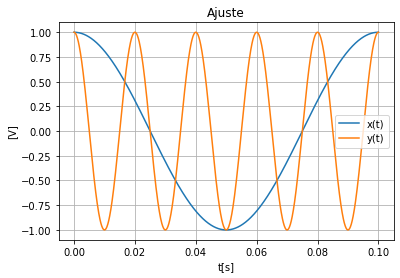

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


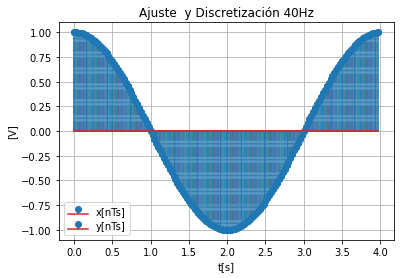

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Discretización 3
F1 = 10
F2 = 50
N = 1000 
Fs = 40 
Tp = 1/F1
t = np.linspace(0,Tp,N)

x = np.cos(2*np.pi*F1*t)
y = np.cos(2*np.pi*F2*t)


plt.plot(t,x,label="x(t)")
plt.plot(t,y,label="y(t)")
plt.legend()
plt.xlabel('t[s]')
plt.ylabel('[V]')
plt.grid()
plt.title("Ajuste")
plt.show()

r1 = 2*np.pi*F1/Fs
r2 = 2*np.pi*F2/Fs-2*np.pi
w1 = (r1+r2)/2
Tf = 2*np.pi/w1
n = np.arange(0,Tf,1/Fs)
xd = np.cos(r1*n)
yd = np.cos(r2*n-2*np.pi)


#plt.plot(t,y,color='r',label="y(t)")
plt.stem(n,xd,'-.', label="x[nTs]")
plt.stem(n,yd,label="y[nTs]")
plt.legend()
plt.xlabel('t[s]')
plt.ylabel('[V]')
plt.grid()
plt.title("Ajuste  y Discretización 40Hz")
plt.show()

D) ¿Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal $x(t)=3cos(2000\pi t)+5sin(6000\pi t)+10 cos(12000\pi t)$? Si se utiliza una frecuencia de muestreo de 5kHz, ¿cuál es la señal discreta obtenida?

Usaremos la frecuencia de Nyquist $F_s \geq 2 F_{\max}$ Además de definir los cosenos originales $\cos[\omega n],$ $n\in \mathbb{Z}$
$$\omega \in [-\pi,\pi]$$
$$\omega = 2 \pi F = \frac{2\pi}{T}$$
$$F = \frac{\omega}{2 \pi}$$

De las funciones tenemos:
$$\omega_1=2000\pi ; \omega_2=6000\pi ; \omega_3=12000\pi$$
O sea que:
$$F_1=1000Hz ; F_2=3000Hz ; F_3=6000Hz$$

Por lo tanto, $F_{\max}=6000Hz$ es la frecuencia máxima del sistema. Haciendo la frecuencia de Nyquist $F_s\geq2*F_{\max}=>F_s\geq 12000Hz$ 


Ahora, si vamos a discretizar con $F_s=5000Hz$ tendríamos que reemplazar $t= n/F_s$
$$x(n/F_s)=3\cos(2\pi F_1n/F_s)+5\sin(2\pi F_2n/F_s)+10\cos(2\pi F_3n/F_s)$$

$$x(n/F_s)=3\cos(2\pi\tfrac{F_1}{F_s} n) + 5 \sin(2\pi \tfrac{F_2}{F_s}n) + 10 \cos(2\pi \tfrac{F_3}{F_s}n)$$

Como $\omega \in [-\pi,\pi]$

$\omega_1=2\pi\tfrac{F_1}{F_s}=2\pi\tfrac{1000}{5000} = \frac{2}{5}\pi < \pi$ (Original, propio)

$\omega_2=2\pi\tfrac{F_2}{F_s}=2\pi\tfrac{3000}{5000} = \frac{6}{5}\pi > \pi$ (Copia, impropio)

$\omega_3=2\pi\tfrac{F_3}{F_s}=2\pi\tfrac{6000}{5000} = \frac{6}{5}\pi >\pi$ (Copia, impropio)

Con esto podemos cambiar los ángulos para encontrar los cosenos originales:
$\omega_{ioriginal}= \omega_{icopia} - 2\pi$

$\omega_{2original} =\omega_{2copia} -  2 \pi = \frac{6}{5}\pi - 2\pi =  \frac{-4\pi}{5}$

$\omega_{3original} =\omega_{3copia} -  2 \pi = \frac{12}{5}\pi - 2\pi =  \frac{2\pi}{5} $

Y así reescribimos $x(t)$ como $x(n)$
$$x(n)=3\cos(\tfrac{2}{5}\pi n) + 5 \sin(\tfrac{6}{5}\pi n) + 10 \cos(\tfrac{12}{5}\pi n)$$
$$x(n)=3\cos(\tfrac{2}{5}\pi n)+5\sin(\tfrac{-4}{5}\pi n)+10\cos(\tfrac{2}{5}\pi n)$$
Siendo entonces esta la señal discreta obtenida:
$$x(n)=13\cos(\tfrac{2}{5}\pi n)+5\sin(\tfrac{-4}{5}\pi n)$$



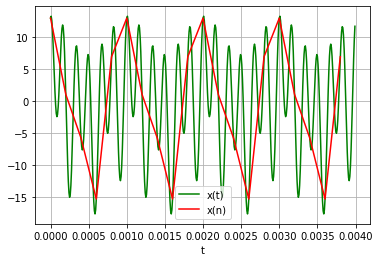

In [0]:
#Discretización 4
import numpy as np
import matplotlib.pyplot as plt

w1 = 2*np.pi*F1
w2 = 2*np.pi*F2
w3 = 2*np.pi*F3
F1 = 1000
F2 = 3000
F3 = 6000
Fs1 =  20*F3
Fs2 = 5000
T1 = 1/F1
T2 = 1/F2
T3 = 1/F3
Ts1 = 1/Fs1
Ts2 = 1/Fs2

x = np.arange(0,4*T1,Ts1) 
y = np.arange(0,4*T1,Ts2) 

xt = 3*np.cos(w1*x) + 5*np.sin(w2*x) + 10*np.cos(w3*x)
yt = 3*np.cos(w1*y) + 5*np.sin(w2*y) + 10*np.cos(w3*y)
plt.plot(x,xt, color='g', label="x(t)")
plt.plot(y,yt, color='r', label="x(n)")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()



E) Demuestre que funciones cosenoidales con frecuencia de oscilación $F_k=F_o+ kF_s$; con $k\in \mathbb{Z}$, no son distinguibles de la función $\cos(2\pi F_0t)$ al utilizar un sistema de discretización con frecuencia de muestreo $F_s$. Realice simulaciones para $k \in (0; \pm1; \pm2; \pm3)$.
$$¿\cos(2\pi F_0t)=\cos(2\pi F_kt)?\rightarrow F_k=F_0+kF_s$$
Si tenemos $t=nT_s=\frac{n}{F_s}$ entonces:
$$(1) \cos(2\pi F_0\frac{n}{F_s})=\cos(2\pi n\frac{F_0}{F_s})$$
$$\cos(2\pi F_k\frac{n}{F_s})=\cos(2\pi n\frac{F_0+kF_s}{F_s})=\cos(2\pi n(\frac{F_0}{F_s}+\frac{kF_s}{F_s}))$$
$$\cos(2\pi n\frac{F_0}{F_s}+2\pi kn)$$
Por la periodicidad del coseno, $2\pi kn$ puede desaparecer. De esto queda:
$$(2) \cos(2\pi n\frac{F_0}{F_s})$$
Se aprecia que $(1)=(2)$.
O sea que con ese muestreo, no son distinguibles.

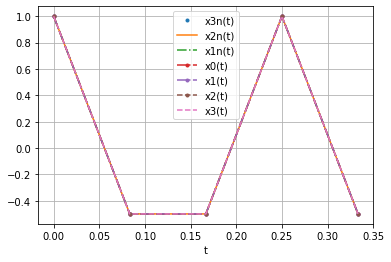

In [0]:
#Discretización 5
import numpy as np
import matplotlib.pyplot as plt


F = 40
Fs = 12
T = 1/F
Ts = 1/Fs
x = np.arange(0,15*T,Ts) 

F3n=F-3*Fs
F2n=F-2*Fs
F1n=F-Fs
F1=F+Fs
F2=F+2*Fs
F3=F+3*Fs

w3n = 2*np.pi*F3n
w2n = 2*np.pi*F2n
w1n = 2*np.pi*F1n
w0 = 2*np.pi*F
w1 = 2*np.pi*F1
w2 = 2*np.pi*F2
w3 = 2*np.pi*F3

xt3n = np.cos(w3n*x)
xt2n = np.cos(w2n*x)
xt1n = np.cos(w1n*x)
xt0 = np.cos(w0*x)
xt1 = np.cos(w1*x)
xt2 = np.cos(w2*x)
xt3 = np.cos(w3*x)


plt.plot(x,xt3n, '.',label="x3n(t)")
plt.plot(x,xt2n, '-',label="x2n(t)")
plt.plot(x,xt1n, '-.',label="x1n(t)")
plt.plot(x,xt0, '-..',label="x0(t)")
plt.plot(x,xt1, '.-.',label="x1(t)")
plt.plot(x,xt2, '.--',label="x2(t)")
plt.plot(x,xt3, '--',label="x3(t)")

plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()


#Sistemas y Manipulación de Señales
1. Demuestre si los siguientes sistemas de la forma $y = T[x]$;
son sistemas lineales e invariantes en el tiempo (SLIT). Simule
los sistemas en Python.
$$A)\ y[n]=\frac{x[n]}{3}+2x[n-1]-y[n-1]$$
$$B)\ y[n]=\sum_{k=-\infty}^n x[k]$$
$$C)\ y[n] = median(x[n])^*$$
$$D)\ y(t) = Ax(t) + B; A, B \in \mathbb{R}$$

$^*$Donde $median$ es la función mediana sobre una ventana de tamaño 3.

2. Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=[-1,1,3^+,0,5,6,-1]$, con respuesta al impulso $h[n]=[1,-2,0^+,1,-1]$, donde $n\in[0,\pm1\pm2,\dots,\pmN]$ y $n=0$ para $x[n]^+$. Nota: Utilizar método gráﬁco para encontrar la salida y comprobar con simulación en Python. Repita el proceso para el sistema con respuesta al escalón $h[n]=[-3,4,-2,3^+,1,-1,2,5]$. 


3. Sea la señal Gaussiana $x(t) = e^{-at^2}$ con $a\in \mathbb{R^+}$, el sistema A con relación entrada-salida $y_A(t)=x^2(t)$; y el sistema lineal e invariante con el tiempo B con respuesta al impulso $h_B(t)=Be^{bt^2}$:

a) Encuentre la salida del sistema en serie $x(t)\rightarrow h_B(t)\rightarrow y_A(t)\rightarrow y(t)$.

b) Encuentre la salida del sistema en serie $x(t)\rightarrow y_A(t)\rightarrow h_B(t)\rightarrow y(t)$.

##Solución

1. Demuestre si los siguientes sistemas de la forma $y = T[x]$;
son sistemas lineales e invariantes en el tiempo (SLIT). Simule
los sistemas en Python.


A)$\ y[n]=\frac{x[n]}{3}+2x[n-1]-y[n-1]$
$$y[n]=T[x(n)]=\frac{x[n]}{3}+2x[n-1]-y[n-1]$$
Linearidad:

Sea $x[n]=ax_1[n]+bx_2[n]$ entonces
$$T[x[n]]=\frac{ax_1[n]+bx_2[n]}{3}+2ax_1[n-1]+bx_2[n-1]-y[n-1]$$
$$T[ax_1[n]]+T[bx_2[n]]=\frac{ax_1[n]}{3}+2ax_1[n-1]-y[n-1]+\frac{bx_2[n]}{3}+2bx_2[n-1]-y[n-1]$$
$$T[ax_1[n]]+T[bx_2[n]]=T[x[n]]+y[n-1]$$
Por lo que no es linear.

Invariaza en el tiempo:

Sea $x_1[n]=x[n-n_0]$ entonces
$$y_1[n]=T[x_1[n]]=\frac{x_1[n]}{3}+2x_1[n-1]-y[n-1]=\frac{x[n-n_0]}{3}+2x[n-n_0-1]-y[n-1]$$
$$y[n-n_0]=\frac{x[n-n_0]}{3}+2x[n-n_o-1]-y[n-n_0-1]$$
$$y[n-n_0]\neq y_1[n]$$
Es variante en el tiempo.

B)$\ y[n]=\sum_{k=-\infty}^n x[k]$

C) $\ y[n] = median(x[n])^*$
Donde $median$ es la función mediana sobre una ventana de tamaño 3.

D) $\ y(t) = Ax(t) + B; A, B \in \mathbb{R}$

2. Hallar la salida $y[n]$ de un SLIT ante la entrada $x[n]=[-1,1,3^+,0,5,6,-1]$, con respuesta al impulso $h[n]=[1,-2,0^+,1,-1]$, donde $n\in[0,\pm1\pm2,\dots,\pmN]$ y $n=0$ para $x[n]^+$. Nota: Utilizar método gráﬁco para encontrar la salida y comprobar con simulación en Python. Repita el proceso para el sistema con respuesta al escalón $[-3,4,-2,3^+,1,-1,2,5]$.

(1)
$$y[n]=x[n]*h[n]$$
$$y[n]=\sum_{k=-7}^7 x[n]h[n-k]: \forall n\in [0,\pm1,\pm2,\dots,\pm6,\pm7]$$

(2)
$$y[n]=x[n]*h[n]$$
$$h[n]=\frac{\partial s[n]}{\partial n}=s[n]-s[n-1]$$
$$h[n]=[-3,7,-6,5^+,-2,-2,3,3,-5]
$$
$$y[n]=\sum_{k=-7}^7 x[n]h[n-k]: \forall n\in [0,\pm1,\pm2,\dots,\pm6,\pm7]$$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


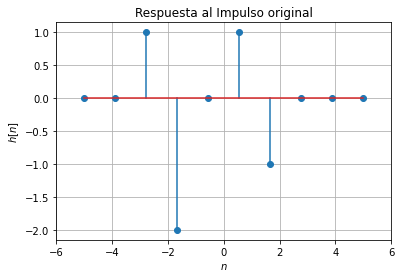

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


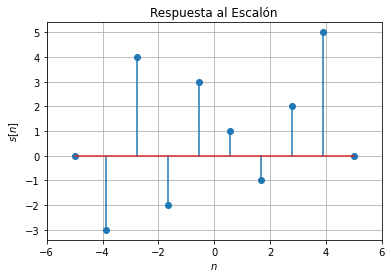

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


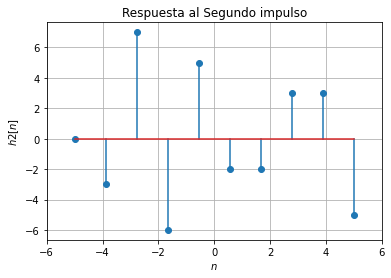

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


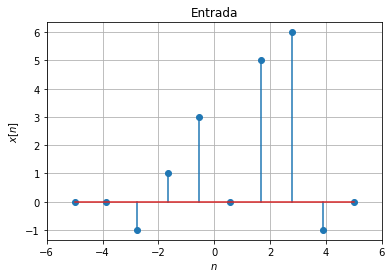

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


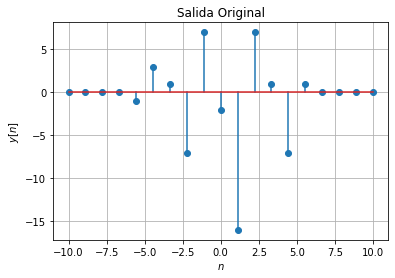

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


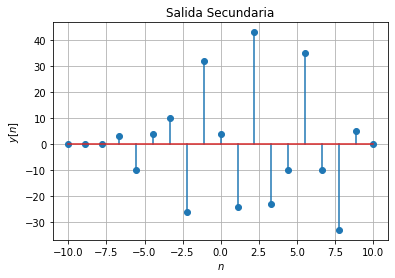

La primera señal de salida es:
y1[n]= [  0   0   0   0  -1   3   1  -7   7  -2 -16   7   1  -7   1   0   0   0
   0]
La segunda respuesta al impulso es:
h2[n]= [ 0 -3  7 -6  5 -2 -2  3  3 -5]
La segunda señal de salida es:
y2[n]= [  0   0   0   3 -10   4  10 -26  32   4 -24  43 -23 -10  35 -10 -33   5
   0]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Simulación #2
h1 = [0,0,1,-2,0,1,-1,0,0,0]
s = [0,-3,4,-2,3,1,-1,2,5,0]
x = [0,0,-1,1,3,0,5,6,-1,0]
N = int(len(s)/2)
#N = int(len(x)/2)
n = np.linspace(-N,N,2*N)
#n = np.linspace(-N,N,2*N)

h2 = np.append(0,np.diff(s)) 

plt.stem(n, h1, label=r'$h1[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$h[n]$')
plt.grid()
plt.title("Respuesta al Impulso original")
plt.show()

plt.stem(n, s, label=r'$s[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$s[n]$')
plt.grid()
plt.title("Respuesta al Escalón")
plt.show()

plt.stem(n, h2, label=r'$h2[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$h2[n]$')
plt.grid()
plt.title("Respuesta al Segundo impulso")
plt.show()

plt.stem(n, x, label=r'$x[n]$')
plt.xlim([-N-1,N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.grid()
plt.title("Entrada")
plt.show()


y1 = np.convolve(x,h1)
ny = np.linspace(-2*N,2*N,4*N-1)
plt.stem(ny, y1, label=r'$y1[n]$')
plt.xlim([-2*N-1,2*N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.grid()
plt.title("Salida Original")
plt.show()

y2 = np.convolve(x,h2)
ny = np.linspace(-2*N,2*N,4*N-1)
plt.stem(ny, y2, label=r'$y2[n]$')
plt.xlim([-2*N-1,2*N+1])
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.grid()
plt.title("Salida Secundaria")
plt.show()

print("La primera señal de salida es:")
print("y1[n]=",y1)
print("La segunda respuesta al impulso es:")
print("h2[n]=",h2)
print("La segunda señal de salida es:")
print("y2[n]=",y2)



3. Sea la señal Gaussiana $x(t) = e^{-at^2}$ con $a\in \mathbb{R^+}$, el sistema A con relación entrada-salida $y_A(t)=x^2(t)$; y el sistema lineal e invariante con el tiempo B con respuesta al impulso $h_B(t)=Be^{bt^2}$:

a) Encuentre la salida del sistema en serie $x(t)\rightarrow h_B(t)\rightarrow y_A(t)\rightarrow y(t)$.

b) Encuentre la salida del sistema en serie $x(t)\rightarrow y_A(t)\rightarrow h_B(t)\rightarrow y(t)$.